2024-08-20 08:06:02.058671: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-20 08:06:02.322577: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-20 08:06:03.105252: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
I0000 00:00:1724133964.358554 1467485 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1724133964.361683 1476838 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.0.4-0ubuntu1~22.04.1), renderer: Mesa Intel(R) UHD Graph

1150 1800
HandLandmarkerResult(handedness=[], hand_landmarks=[], hand_world_landmarks=[])


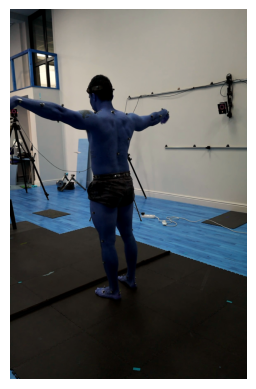

In [1]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import cv2
import matplotlib.pyplot as plt

root_path = 'path/to/your/data/'

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hands/hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file(f"{root_path}frames/C5/S28/C5S28A4D2/C5S28A4D2_0268.jpg")
print(image.width, image.height)

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)
print(detection_result)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide the axis
plt.show()

I0000 00:00:1724134117.352641 1467485 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1724134117.353446 1477532 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.0.4-0ubuntu1~22.04.1), renderer: Mesa Intel(R) UHD Graphics 770 (ADL-S GT1)
W0000 00:00:1724134117.361744 1477543 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724134117.374889 1477546 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


hand_landmarks_list: 0
handedness_list: 0


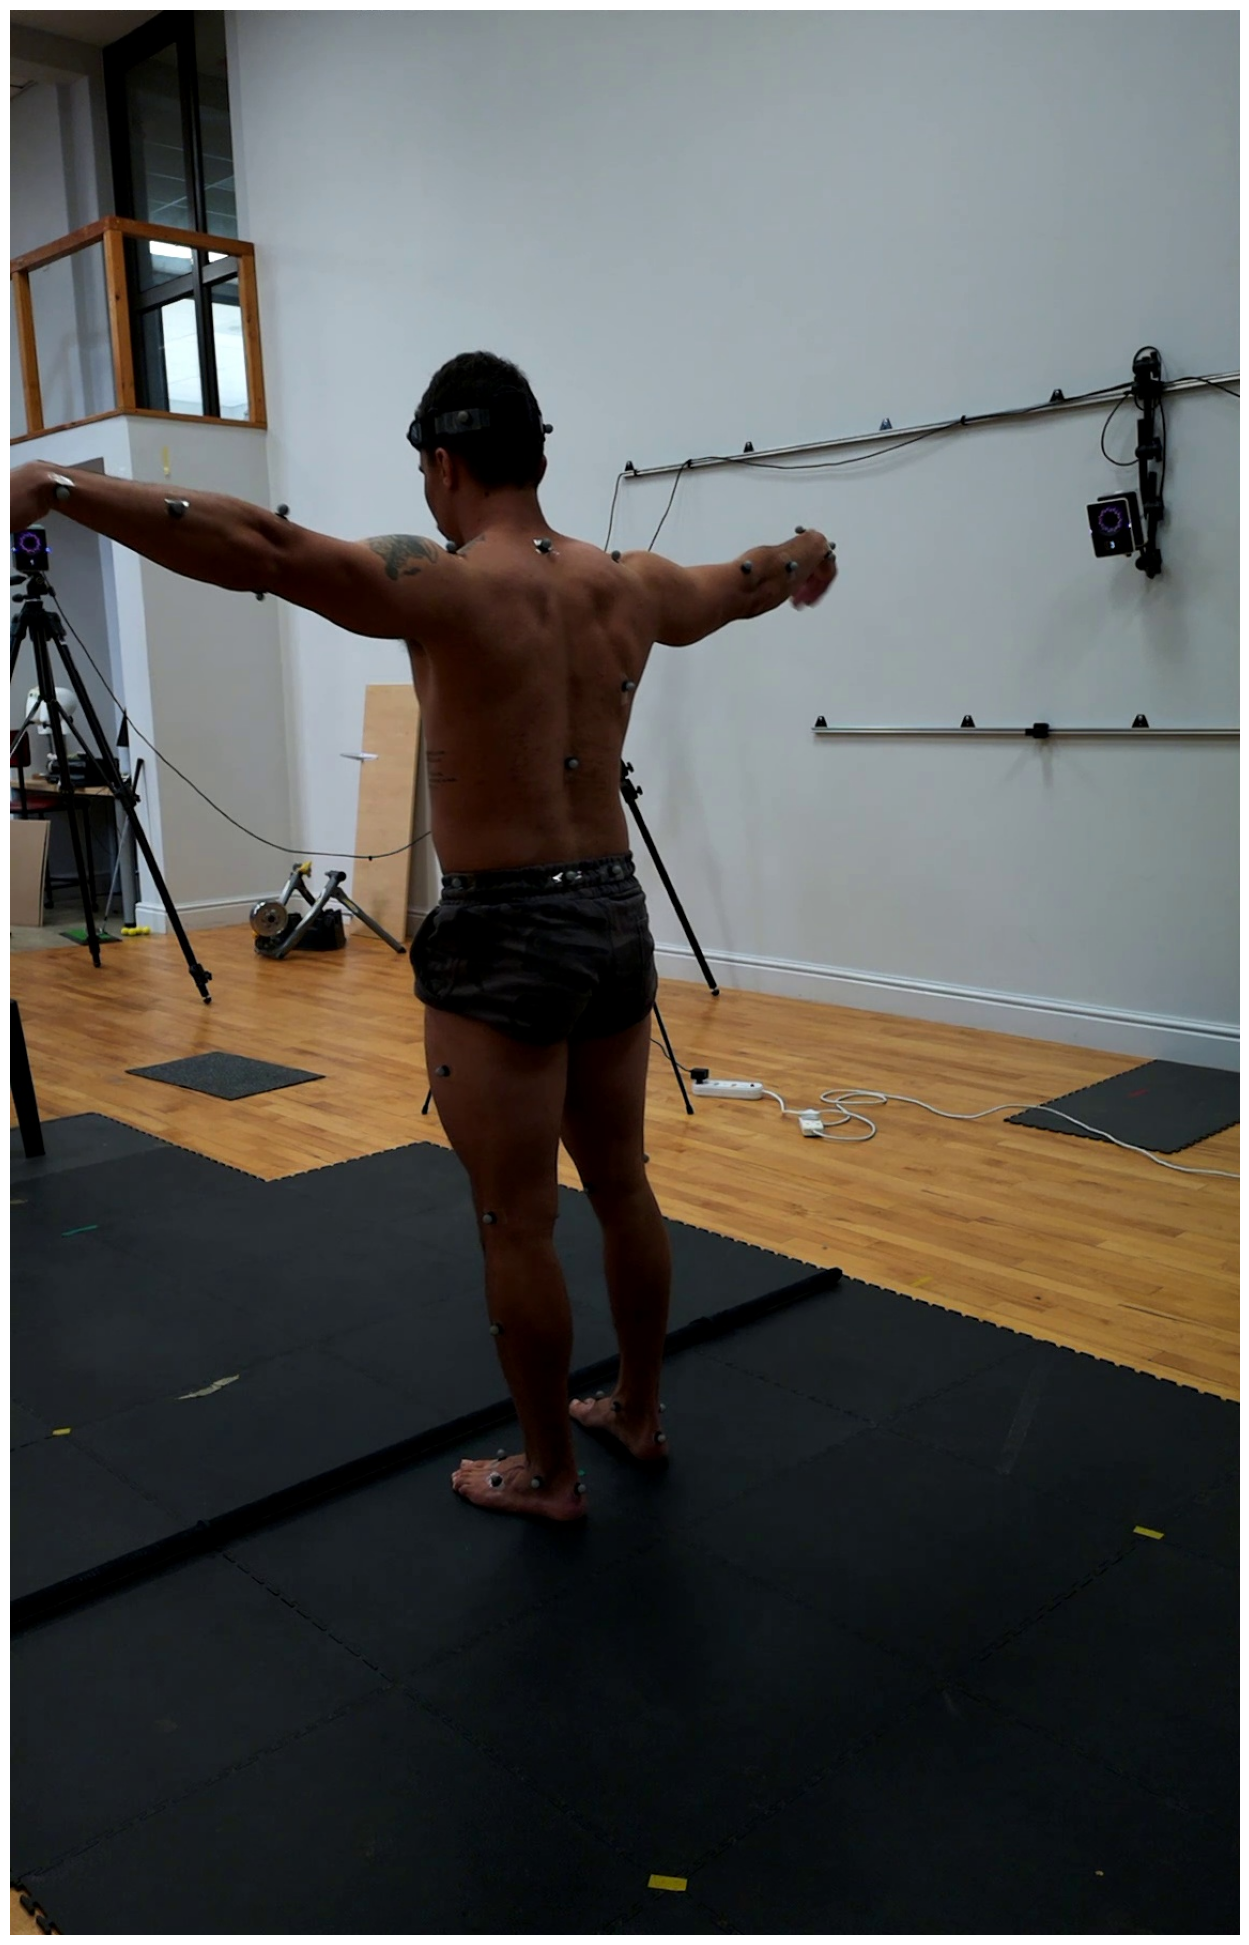

In [2]:
base_options = python.BaseOptions(model_asset_path='hands/hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

img = cv2.imread(f"{root_path}frames/C5/S28/C5S28A4D2/C5S28A4D2_0268.jpg")
image = mp.Image.create_from_file(f"{root_path}frames/C5/S28/C5S28A4D2/C5S28A4D2_0268.jpg")
detection_result = detector.detect(image)

hand_landmarks_list = detection_result.hand_landmarks
handedness_list = detection_result.handedness

print(f'hand_landmarks_list: {len(hand_landmarks_list)}')
print(f'handedness_list: {len(handedness_list)}')

for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]
    name = handedness[0].category_name
    print(handedness)
    print(len(hand_landmarks))
    print(hand_landmarks[0])

    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    hand_right_xy = []
    hand_left_xy = []
    if name == 'Right':
        hand_right_xy = [[x, y] for x, y in zip(x_coordinates, y_coordinates)]
    else:
        hand_left_xy = [[x, y] for x, y in zip(x_coordinates, y_coordinates)]

    #plot hand_right_xy and hand_left_xy on image with index
    for i, (x, y) in enumerate(hand_right_xy):
        cv2.circle(img, (int(x * img.shape[1]), int(y * img.shape[0])), 3, (255, 0, 0), -1)
        cv2.putText(img, str(i), (int(x * img.shape[1]), int(y * img.shape[0])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    for i, (x, y) in enumerate(hand_left_xy):
        cv2.circle(img, (int(x * img.shape[1]), int(y * img.shape[0])), 3, (255, 0, 0), -1)
        cv2.putText(img, str(i), (int(x * img.shape[1]), int(y * img.shape[0])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

plt.figure(figsize=(30, 25))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()